In [1]:
import numpy as np
import pandas as pd

## SQL

**Answer each of the following questions as well as you can. Feel free to add extra cells to give space for your answers.**

**You have a MySQL database with a table called `product_sales` structured like**

```
company_id | product_id | sales | quarter
-----------+------------+-------+--------
     0     |     1      |  100  |  2016:1
                  ...
```

**one called `company_revenue` like**

```
company_id | revenue | quarter
-----------+---------+--------
     0     |   150   |  2016:1
             ...
```

**and one called `product_type` like**

```
product_id | product_type  
-----------+--------------
     0     |  smartphone 
           ...
```



1. **For company 100, write a SQL query for the total sales (over all products) by quarter.**


In [ ]:
```
SELECT 
    SUM(sales) AS total_sales
FROM 
    product_sales
GROUP BY 
    company_id,
    quarter

```

2. **For company 100, write a query for the total sales for products of type `smartphone` by quarter.**

In [ ]:
```
SELECT 
    SUM(sales) AS total_sales
FROM 
    product_sales
GROUP BY 
    product_id,
    quarter
HAVING
    product_id = 0
```

3. **Now assuming an exhaustive list of product types is `smartphone`, `tablet`, and `desktop`, write a query to produce a pivot table like**

```
        |  smartphone_sales | tablet_sales | desktop_sales
company |                   |              |
--------+-------------------+--------------+---------------
    0   |        100        |     0        |    50
    1   |         0         |     100      |    25
                          ...
```

In [ ]:
```
SELECT
    s.company_id,
    p.product_type
FROM
    product_sales s
    join product_type p on s.product_id = p.product_id
GROUP BY
    product_id

pivot(
  sum(sales)
  for product_type in ('smartphone_sales', 'tablet_sales', 'desktop_sales')
) piv;

```

## Probability, Statistics, and Data

1. **What does "statistical independence" mean? What would (gaussian marginal) statistically independent variables look like on a scatter plot?**

Statistical independence means that any one event is not correlated to the other or doesnt provide info about the other
if the events/variables were correlated there would be a clear +ve/-ve correlation on the scatter plot(regression line). However when statistically independent variables are plotted on a scatter there would be no correlation or no regression on the plot

2. **Given the following data set (in `df`), compute a 2x2 table for P(Y|X).**


In [2]:
N = 1000
x = np.random.binomial(1, p=0.5, size=N)
y = np.random.binomial(1, p=0.4 + 0.5*x)
df = pd.DataFrame({'X': x, 'Y': y})

3. **From the previous question, show that P(Y=1|X=0) is statistically significantly different from P(Y=1|X=1). Show your work, and explain your answer.**

4. **The following data set contains a $Y$ variable, and many $X_i$ variables. Which $X_i$ variables, if any, are useful for predicting $Y$? Be sure to explain your reasoning, and comment your code with explanation.**

In [2]:
# the data is stored locally with the test in data.csv. Make sure you point pandas to the right directory!
import pandas as pd
df = pd.read_csv('data.csv')

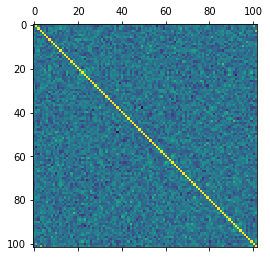

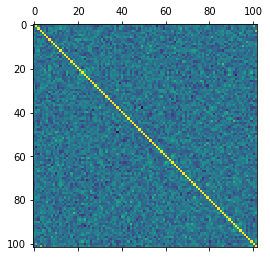

In [4]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [5]:
df.corr(method='pearson')

,Unnamed: 0,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,Y
Unnamed: 0,1.000000,-0.186652,-0.049070,0.122377,0.136132,-0.067001,0.290846,0.111852,0.090878,0.030405,...,-0.081607,-0.007949,0.006465,0.218963,0.208081,0.116665,-0.026425,-0.073431,-0.139766,-0.222908
X_0,-0.186652,1.000000,0.101276,-0.289753,0.066814,-0.111493,-0.087801,-0.042299,-0.183046,-0.075809,...,-0.108212,-0.062616,0.106468,0.101035,0.096577,-0.028062,-0.111252,-0.012367,0.570816,-0.236513
X_1,-0.049070,0.101276,1.000000,-0.125492,-0.095469,0.119183,-0.257727,0.190845,0.116369,-0.016160,...,-0.020084,-0.228236,0.029965,0.196476,0.086070,-0.232869,0.027517,-0.184451,0.069684,0.006696
X_2,0.122377,-0.289753,-0.125492,1.000000,-0.016500,0.270065,-0.305669,0.018931,0.163725,0.168328,...,0.022877,-0.001734,-0.071143,0.200194,-0.193315,0.117708,0.152400,0.165426,-0.256671,0.640868
X_3,0.136132,0.066814,-0.095469,-0.016500,1.000000,-0.054640,0.000895,0.166678,0.210203,-0.195624,...,-0.198995,-0.088669,0.316650,0.099443,-0.251886,0.130023,0.064244,-0.022281,-0.154895,-0.134960
X_4,-0.067001,-0.111493,0.119183,0.270065,-0.054640,1.000000,-0.159251,-0.009117,0.011161,0.037036,...,0.169477,-0.307381,0.139881,0.111482,0.241687,-0.257016,0.159716,0.049433,0.132891,0.216526
X_5,0.290846,-0.087801,-0.257727,-0.305669,0.000895,-0.159251,1.000000,-0.197544,-0.289709,0.074624,...,0.049698,0.154228,-0.160806,-0.169001,0.013617,-0.149303,0.013606,-0.064880,-0.089530,-0.230897
X_6,0.111852,-0.042299,0.190845,0.018931,0.166678,-0.009117,-0.197544,1.000000,-0.051646,-0.240602,...,-0.140991,0.145949,0.249437,-0.017831,0.007152,-0.099449,-0.105501,-0.185135,-0.161349,-0.089700
X_7,0.090878,-0.183046,0.116369,0.163725,0.210203,0.011161,-0.289709,-0.051646,1.000000,-0.072097,...,0.018759,-0.227228,-0.053851,0.039244,-0.028632,0.402570,0.082108,0.098195,-0.026501,0.041676
X_8,0.030405,-0.075809,-0.016160,0.168328,-0.195624,0.037036,0.074624,-0.240602,-0.072097,1.000000,...,0.116194,0.037082,-0.224041,0.006761,0.015540,-0.073641,0.181279,0.093216,0.120345,0.244294


In [19]:
df.dtypes

Unnamed: 0      int64
X_0           float64
X_1           float64
X_2           float64
X_3           float64
X_4           float64
X_5           float64
X_6           float64
X_7           float64
X_8           float64
X_9           float64
X_10          float64
X_11          float64
X_12          float64
X_13          float64
X_14          float64
X_15          float64
X_16          float64
X_17          float64
X_18          float64
X_19          float64
X_20          float64
X_21          float64
X_22          float64
X_23          float64
X_24          float64
X_25          float64
X_26          float64
X_27          float64
X_28          float64
               ...   
X_71          float64
X_72          float64
X_73          float64
X_74          float64
X_75          float64
X_76          float64
X_77          float64
X_78          float64
X_79          float64
X_80          float64
X_81          float64
X_82          float64
X_83          float64
X_84          float64
X_85      

In [4]:
df.describe()

,Unnamed: 0,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,Y
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,0.153702,-0.032374,0.014147,-0.216863,0.177577,0.042459,-0.174686,-0.121284,-0.060280,...,-0.033087,0.073852,-0.216262,-0.100790,0.086148,-0.195100,0.054315,0.110207,-0.212366,-0.135595
std,14.57738,0.985440,1.305268,0.926229,0.995365,0.953766,1.036020,0.954819,1.092237,0.997873,...,0.989837,0.954284,0.903118,1.070632,1.026285,0.854047,1.238431,1.125329,1.013679,1.352041
min,0.00000,-1.777205,-2.792421,-1.909700,-2.499832,-1.933785,-2.383327,-2.003132,-3.278442,-2.223454,...,-2.395197,-1.978335,-2.554964,-2.671434,-3.007441,-1.719287,-2.820887,-2.582232,-2.451438,-2.589289
25%,12.25000,-0.528295,-0.989212,-0.686094,-1.107968,-0.596750,-0.719504,-0.858820,-0.742882,-0.864731,...,-0.649851,-0.712137,-0.600505,-0.829572,-0.472830,-0.907493,-0.785142,-0.525155,-1.064669,-1.178187
50%,24.50000,0.188693,-0.128964,0.035311,-0.145942,0.178865,0.117989,-0.184938,-0.038906,-0.094358,...,-0.098567,0.149148,-0.165092,-0.141586,0.251252,-0.230819,0.345326,0.026073,-0.251026,-0.300377
75%,36.75000,0.750674,0.874312,0.650261,0.406322,0.953253,0.791146,0.577431,0.752350,0.469664,...,0.562035,0.681070,0.494838,0.611870,0.795443,0.384572,0.978860,0.905584,0.254832,0.811695
max,49.00000,2.904030,2.766002,1.987427,1.638381,2.063600,2.473978,1.716018,2.005324,2.000107,...,2.244686,2.127678,1.461799,2.152128,2.349808,1.661616,2.158857,2.745118,2.519095,3.062367


In [12]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
array = df.values
X = array[:,0:8]
Y = array[:,8]

In [16]:
# feature extraction
model = ExtraTreesClassifier()

model.fit(X, Y)
#have float type so solving issue below

ValueError: Unknown label type: 'continuous'

In [25]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [26]:
model = ExtraTreesClassifier()

In [47]:
data = df_int.iloc[:,:101]

In [48]:
target = df_int.iloc[:,101:102]

In [49]:
model.fit(data, target)

C:\Users\akshi\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
df_int = df.astype(int)
#converting to int as float is not acceptable

In [50]:
print(model.feature_importances_)
#higer value is higher importance

[ 0.01461104  0.00520623  0.0085483   0.02710591  0.00916969  0.01051864
  0.00906892  0.00451919  0.00302297  0.00778367  0.00587909  0.021129
  0.02341912  0.00403063  0.00801367  0.00467187  0.00968092  0.01832047
  0.01714757  0.00322451  0.00914209  0.00683528  0.00481844  0.          0.
  0.00564289  0.01317799  0.00302297  0.00478638  0.0242066   0.01733487
  0.01078194  0.0077746   0.01544878  0.00451156  0.02675333  0.00334692
  0.02098422  0.00476258  0.00394666  0.          0.00860828  0.00541616
  0.00302297  0.00705361  0.01669149  0.00935683  0.011663    0.01518526
  0.00955153  0.00630949  0.00906892  0.01275407  0.00700322  0.00302297
  0.018741    0.00778416  0.00394426  0.01092732  0.00904137  0.01277024
  0.01611881  0.          0.00705361  0.01273968  0.00927504  0.00403063
  0.01189037  0.          0.00554212  0.01688299  0.00261991  0.00302297
  0.00885517  0.01964997  0.01493077  0.00583334  0.01500695  0.
  0.02334595  0.0308591   0.03461547  0.00755744  0.00412

## Python

1. **Using the most appropriate built-in data type (and its associated methods), compute the jaccard similarity between the following lists of items:**

In [ ]:
a = ['a', 'b', 'c', 'd']
b = ['c', 'd', 'e', 'f']

2. **Speed up (and time) the following calculation for the sum of the values in the matrix a. Assume you get data marshalling "for free". Explain why your approach is faster.**

In [ ]:
a = [[1,2,3,4],
     [5,6,7,8],
     [9,10,11,12],
     [13,14,15,16]]

total = 0
for row in a:
    for value in row:
        total += value

3. **Data projects (e.g. building models; showing dashboards; etc.) often require querying for data in real-time. What are some advantages and disadvantages of implementing database queries within your project code (assuming you have many projects)? What is another approach that might help mitigate these issues?**

4. **Why is it a better practice to use a context manager for opening files than to manage file objects explicitly on your own?**

5. **What is `async def` used for, and how does it make programs use computing resources more efficiently?**

## Machine Learning

1. **Why do we usually define a train/test split when training a model?**

In [ ]:
to avoid training entirely on 1 dataset & mainly to evaluate its performance
train to train a model
test to validate models performance & optimise

2. **When would you need to define a train/test/validation split, instead of just a train/test split when you're training a model?**

In [ ]:
validation data set is required when we need to regularize the mode for over/under fitting

3. **Suppose you train a model to predict a real-valued $Y$ from a real-valued $X$ by minimizing mean squared error. Suppose the model has enough capacity, and training works as expected. If you predict the value of $Y$ using some $X$, what is that value of $Y$ an estimator for? How is this quantity different from the predicted value if you had trained by minimizing mean absolute deviation?**

4. **How do you know when a model is overfitting?**

In [ ]:
high variance & when the model is sensitive to small variations

5. **What is a strategy for controlling overfitting? Explain a procedure for using it.**

In [ ]:
regularization
depending on dataset size & number of features I would aply L1 for few variables/medium dataset or L2 if many variables/large dataset
however it depends on the alpha vlue aswell

6. **What is bagging, and why does it have a performance limit? What's a common machine learning model that uses bagging?**

In [ ]:
Bagging: method used to reduce variance while retaining bias
    
performance limits: because we need to smaple the input data to generate multiple sets of input data and the model needs to run 
    on each of these individual models & finally the predictions are averaged to get the final decision

ML model that uses baggging: SVM & Neural Nets